In [1]:
import pandas as pd
import numpy as np
import sklearn
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet")

In [3]:
#display first 5 rows
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [4]:
#make columns uniform
df.columns = df.columns.str.lower()

In [5]:
df

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


In [6]:
#find statistical values of the table
df.describe().round(3)

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2964624.000,2824462.000,2964624.000,2824462.000,2964624.000,2964624.000,2964624.000,2964624.000,2964624.000,2964624.000,2964624.000,2964624.000,2964624.000,2964624.000,2824462.000,2824462.000
mean,1.754,1.339,3.652,2.069,166.018,165.117,1.161,18.175,1.452,0.483,3.336,0.527,0.976,26.802,2.256,0.141
std,0.433,0.850,225.463,9.823,63.624,69.315,0.581,18.950,1.804,0.118,3.897,2.128,0.218,23.386,0.823,0.488
min,1.000,0.000,0.000,1.000,1.000,1.000,0.000,-899.000,-7.500,-0.500,-80.000,-80.000,-1.000,-900.000,-2.500,-1.750
25%,2.000,1.000,1.000,1.000,132.000,114.000,1.000,8.600,0.000,0.500,1.000,0.000,1.000,15.380,2.500,0.000
50%,2.000,1.000,1.680,1.000,162.000,162.000,1.000,12.800,1.000,0.500,2.700,0.000,1.000,20.100,2.500,0.000
75%,2.000,1.000,3.110,1.000,234.000,234.000,1.000,20.500,2.500,0.500,4.120,0.000,1.000,28.560,2.500,0.000
max,6.000,9.000,312722.300,99.000,265.000,265.000,4.000,5000.000,14.250,4.000,428.000,115.920,1.000,5000.000,2.500,1.750


In [7]:
#number of missiing values
df.isna().sum()

vendorid                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
ratecodeid               140162
store_and_fwd_flag       140162
pulocationid                  0
dolocationid                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
airport_fee              140162
dtype: int64

In [8]:
#finding the number of unique values
df.nunique()

vendorid                       3
tpep_pickup_datetime     1575706
tpep_dropoff_datetime    1574780
passenger_count               10
trip_distance               4489
ratecodeid                     7
store_and_fwd_flag             2
pulocationid                 260
dolocationid                 261
payment_type                   5
fare_amount                 8970
extra                         48
mta_tax                        8
tip_amount                  4192
tolls_amount                1127
improvement_surcharge          5
total_amount               19241
congestion_surcharge           6
airport_fee                    3
dtype: int64

In [9]:
#finding the various datatypes in the dataframe
df.dtypes

vendorid                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
ratecodeid                      float64
store_and_fwd_flag               object
pulocationid                      int32
dolocationid                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [10]:
#finding the duration which represents the target variable
df['duration'] = pd.to_datetime(df.tpep_dropoff_datetime) - pd.to_datetime(df.tpep_pickup_datetime)
df['duration'] = (df['duration'].dt.total_seconds())/60

In [11]:
df['duration']

0          19.800000
1           6.600000
2          17.916667
3           8.300000
4           6.100000
             ...    
2964619     8.616667
2964620    14.750000
2964621    19.000000
2964622    17.850000
2964623    15.083333
Name: duration, Length: 2964624, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='Count'>

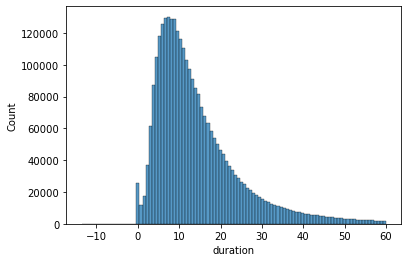

In [12]:
#checking the distribution of the target variable #from the hisplot we can tell the distribution has a long tail 
sns.histplot(df.duration[df.duration < 60] ,bins= 100)

In [13]:
#The log function gives a normal distribution of the target
log_duration =  np.log1p(df.duration)

/home/codespace/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='duration', ylabel='Count'>

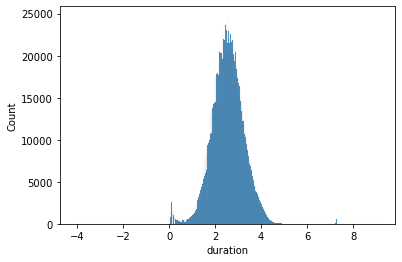

In [14]:
sns.histplot(log_duration)

In [15]:
df.isnull().sum()

vendorid                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
ratecodeid               140162
store_and_fwd_flag       140162
pulocationid                  0
dolocationid                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
airport_fee              140162
duration                      0
dtype: int64

In [27]:
def fill_mean_values(df, column): 
    mode=df[column].mode()[0]
    df[column].fillna(mode, inplace=True )

In [28]:
fill_mean_values(df, df.passenger_count)

KeyError: "None of [Index([None, None, None, None, None, None, None, None, None, None,\n       ...\n       None, None, None, None, None, None, None, None, None, None],\n      dtype='object', length=2964624)] are in the [columns]"

In [ ]:
#categoricals = ['pulocationid','dolocationid','ratecodeid','payment_type','vendorid']
categoricals = ['pulocationid','dolocationid']
#numericals =  ['passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','airport_fee']
numericals =  ['passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount']

In [ ]:
#function to convert to strings
for categorical in categoricals:
    df[categorical] = df[categorical].astype('object')

In [ ]:
#check to confirm the change in data types
df.dtypes

In [ ]:
#convert values to dict
train_dicts = df[categoricals + numericals].to_dict(orient='records')

In [ ]:
dv= DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

In [ ]:
y_train = df.duration.values
y_train

In [ ]:
model = LinearRegression()

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
model.fit(X_train, y_train)